<a href="https://colab.research.google.com/github/michalis0/DataMining_and_MachineLearning/blob/master/week5/Classification_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining and Machine Learning - Week 5
# Classification

Classification is part of **supervised learning**. The objective is to correctly assign objects to different, predifined categories or labels. An easy to understand example is classifying emails as “spam” or “not spam.”

### Table of Contents
#### 1. Basic Example
* 1.1 Create Data
* 1.2 Encoding of `Group`
* 1.3 Plot `x1` and `x2` according to `target`
* 1.4 Logistic Regression and Decision Boundary

#### 2. Predict Ad Click
* 2.1 Load and explore the dataset
* 2.2 Exploratory Data Analysis
* 2.3 Logistic Regression
* 2.4 Logistic Regression with standardization

#### 3. Multi Class Regression

In [1]:
# Import required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler

%matplotlib inline
sns.set_style("white")
np.set_printoptions(precision=2)

## 1. Basic Example

### 1.1 Create Data
For this example, we create data from scratch.

In [2]:
sample = [
    ["A", 0.1, 0.2, 0],
    ["A", 0.3, 0.05, 0],
    ["B", 0.3, 0.2, 0],
    ["D", 0.7, 0.65, 1],
    ["B", 0.25, 0.3, 0],
    ["A", 0.85, 0.55, 1],
    ["C", 0.1, 0.45, 0],
    ["C", 0.9, 0.85, 1],
    ["D", 0.95, 0.55, 1],
    ["B", 0.8, 0.8, 1]
]

df = pd.DataFrame(sample, columns=["Group", "x1", "x2", "target"])
df

,Group,x1,x2,target
0,A,0.10,0.20,0
1,A,0.30,0.05,0
2,B,0.30,0.20,0
3,D,0.70,0.65,1
4,B,0.25,0.30,0
5,A,0.85,0.55,1
6,C,0.10,0.45,0
7,C,0.90,0.85,1
8,D,0.95,0.55,1
9,B,0.80,0.80,1


### 1.2 Encoding of `Group`

In [3]:
# one-hot encoding
one_hot = OneHotEncoder()
cat_to_onehot = one_hot.fit_transform(df[["Group"]]).toarray()
cat_to_onehot = pd.DataFrame(cat_to_onehot)
cat_to_onehot

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0
7,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,1.0
9,0.0,1.0,0.0,0.0


In [4]:
# Label encoding
le = LabelEncoder()
cat_to_label = le.fit_transform(df["Group"])
cat_to_label

array([0, 0, 1, 3, 1, 0, 2, 2, 3, 1])

In [5]:
le.classes_

array(['A', 'B', 'C', 'D'], dtype=object)

### 1.3 Plot `x1` and `x2` according to `target`

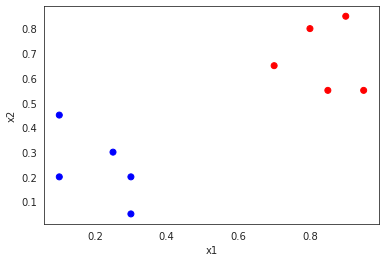

In [6]:
x1 = df["x1"]
x2 = df["x2"]
y = df["target"]

color1 = "blue" # y = 0
color2 = "red" # y = 1
colormap = np.array([color1,color2])

plt.scatter(x1, x2, c=colormap[y])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### 1.4 Logistic Regression and Decision Boundary

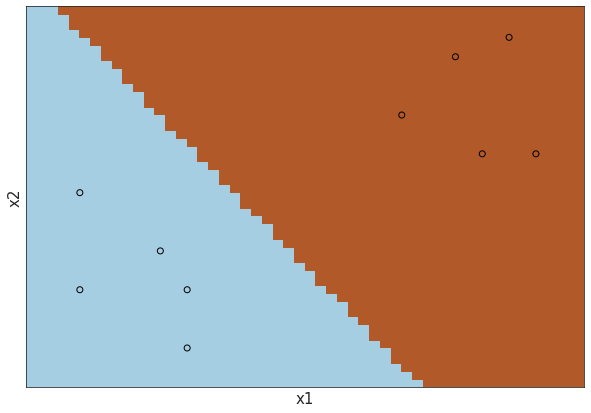

In [7]:
# Fit model
X = df[["x1", "x2"]].values
y = df["target"]
LR = LogisticRegressionCV()
LR.fit(X, y)

# Plot
x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = LR.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 7))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('x1', fontsize=15)
plt.ylabel('x2', fontsize=15)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [8]:
# Prediction for new point
p = np.array([[0.5, 0.5]])
LR.predict(p)

array([1])

## 2. Predict Ad Click
In this section, we use **Logistic Regression** to predict whether or not a particular Internet user has clicked on an advertisement.

### 2.1 Load and explore the dataset

In [9]:
data = pd.read_csv("https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/week5/data/advertising.csv")
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [11]:
# Date format
data["Timestamp"] = pd.to_datetime(data["Timestamp"], format="%Y-%m-%d")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.2+ KB


In [13]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


The data set has 1000 rows and the following features:

* `Daily Time Spent on Site`: consumer time on site in minutes
* `Age`: cutomer age in years
* `Area Income`: Avg. Income of geographical area of consumer
* `Daily Internet Usage`: Avg. minutes a day consumer is on the internet
* `Ad Topic Line`: Headline of the advertisement
* `City`: City of consumer
* `Male`: Whether or not consumer was male
* `Country`: Country of consumer
* `Timestamp`: Time at which consumer clicked on Ad or closed window
* `Clicked on Ad`: 0 or 1 indicated clicking on Ad

### 2.2 Exploratory Data Analysis

Text(0.5, 0, 'Age')

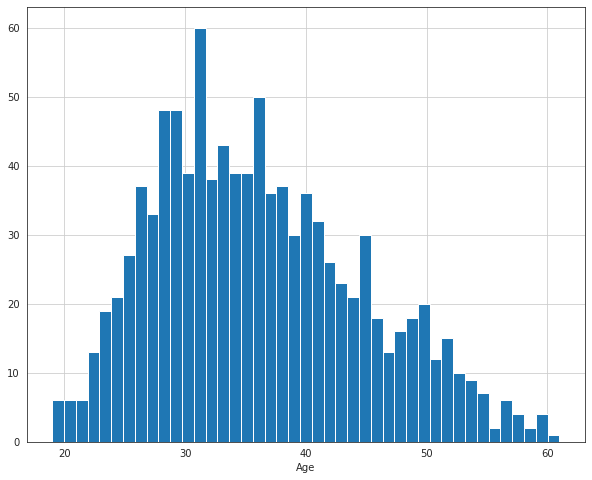

In [14]:
# Age repartition
plt.figure(figsize=(10, 8))
data.Age.hist(bins=data.Age.nunique())
plt.xlabel('Age')

Text(0.5, 0, 'Daily Time Spent on Site')

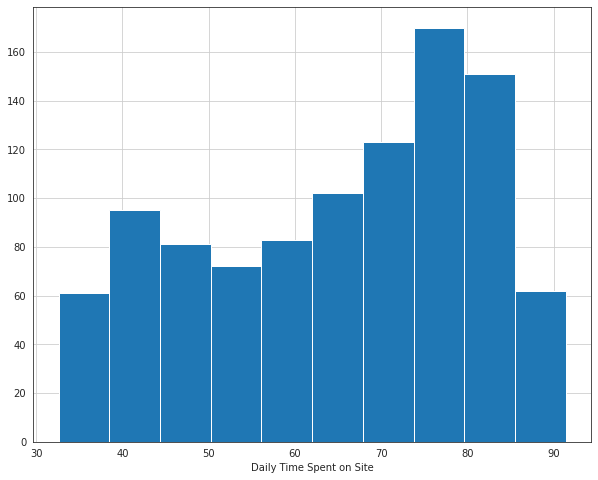

In [15]:
# Time on site
plt.figure(figsize=(10, 8))
data["Daily Time Spent on Site"].hist()
plt.xlabel("Daily Time Spent on Site")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


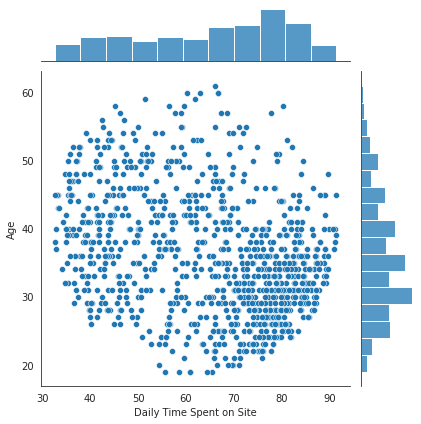

In [16]:
# Does younger people spend more time on site?
sns.jointplot(data["Daily Time Spent on Site"], data.Age)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


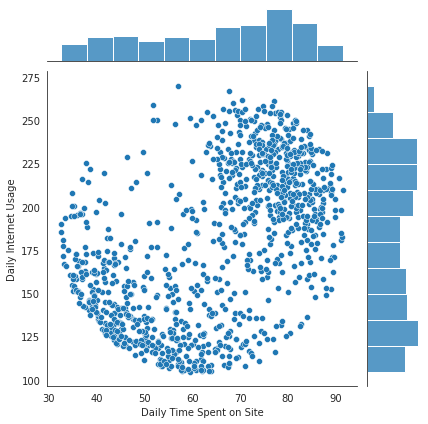

In [17]:
sns.jointplot(data["Daily Time Spent on Site"], data["Daily Internet Usage"])

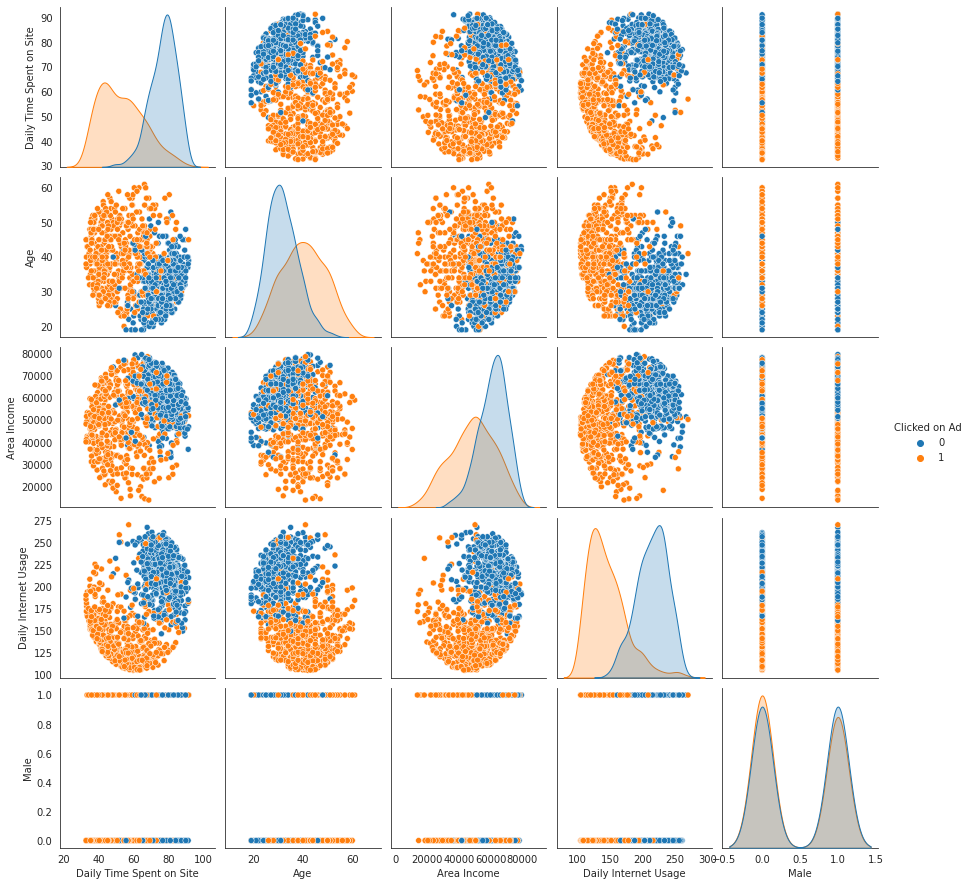

In [18]:
sns.pairplot(data, hue='Clicked on Ad')

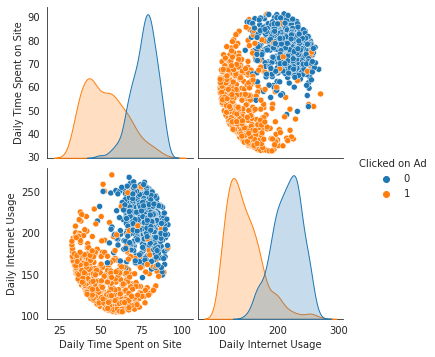

In [19]:
data2 = data[["Daily Time Spent on Site", "Daily Internet Usage", "Clicked on Ad"]]
sns.pairplot(data2, hue="Clicked on Ad")

### 2.3 Logistic Regression

Logistic regression is the classic linear classification algorithm for two-class problems.

#### 2.3.1 Theory

##### Logistic Regression

Logistic regression is named for the function used at the core of the method, the [logistic function](https://en.wikipedia.org/wiki/Logistic_function).

The logistic function, also called the **`Sigmoid function`** was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

$$\frac{1}{1 + e^{-x}}$$

$e$ is the base of the natural logarithms and $x$ is value that you want to transform via the logistic function.

Text(0.5, 1.0, 'Sigmoid Function')

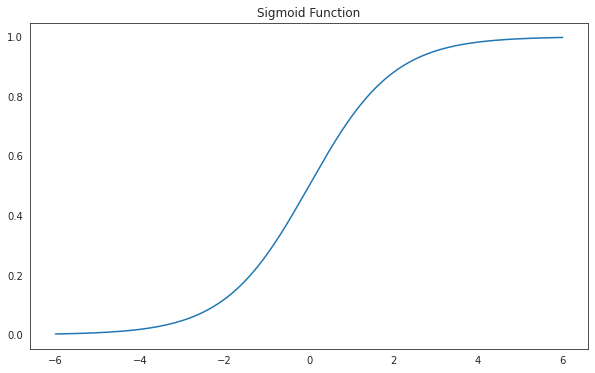

In [20]:
x = np.linspace(-6, 6, num=1000)
plt.figure(figsize=(10, 6))
plt.plot(x, (1 / (1 + np.exp(-x))))
plt.title("Sigmoid Function")

The logistic regression equation has a very similar representation like linear regression. The difference is that the output value being modelled is binary in nature.

$$\hat{y}=\frac{e^{\beta_0+\beta_1x_1}}{1+\beta_0+\beta_1x_1}$$

or

$$\hat{y}=\frac{1.0}{1.0+e^{-\beta_0-\beta_1x_1}}$$

$\beta_0$ is the intecept term

$\beta_1$ is the coefficient for $x_1$

$\hat{y}$ is the predicted output with real value between 0 and 1. To convert this to binary output of 0 or 1, this would either need to be rounded to an integer value or a cutoff point be provided to specify the class segregation point.
***
##### Learning the Logistic Regression Model

The coefficients (Beta values b) of the logistic regression algorithm must be estimated from your training data. This is done using [maximum-likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation).

Maximum-likelihood estimation is a common learning algorithm used by a variety of machine learning algorithms, although it does make assumptions about the distribution of your data (more on this when we talk about preparing your data).

The best coefficients would result in a model that would predict a value very close to 1 (e.g. male) for the default class and a value very close to 0 (e.g. female) for the other class. The intuition for maximum-likelihood for logistic regression is that a search procedure seeks values for the coefficients (Beta values) that minimize the error in the probabilities predicted by the model to those in the data (e.g. probability of 1 if the data is the primary class).

We are not going to go into the math of maximum likelihood. It is enough to say that a minimization algorithm is used to optimize the best values for the coefficients for your training data. This is often implemented in practice using efficient numerical optimization algorithm (like the Quasi-newton method).

When you are learning logistic, you can implement it yourself from scratch using the much simpler gradient descent algorithm.

##### Prepare Data for Logistic Regression
The assumptions made by logistic regression about the distribution and relationships in your data are much the same as the assumptions made in linear regression.

Much study has gone into defining these assumptions and precise probabilistic and statistical language is used. My advice is to use these as guidelines or rules of thumb and experiment with different data preparation schemes.

Ultimately in predictive modeling machine learning projects you are laser focused on making accurate predictions rather than interpreting the results. As such, you can break some assumptions as long as the model is robust and performs well.

- **Binary Output Variable:** This might be obvious as we have already mentioned it, but logistic regression is intended for binary (two-class) classification problems. It will predict the probability of an instance belonging to the default class, which can be snapped into a 0 or 1 classification.
- **Remove Noise:** Logistic regression assumes no error in the output variable (y), consider removing outliers and possibly misclassified instances from your training data.
- **Gaussian Distribution:** Logistic regression is a linear algorithm (with a non-linear transform on output). It does assume a linear relationship between the input variables with the output. Data transforms of your input variables that better expose this linear relationship can result in a more accurate model. For example, you can use log, root, Box-Cox and other univariate transforms to better expose this relationship.
- **Remove Correlated Inputs:** Like linear regression, the model can overfit if you have multiple highly-correlated inputs. Consider calculating the pairwise correlations between all inputs and removing highly correlated inputs.
- **Fail to Converge:** It is possible for the expected likelihood estimation process that learns the coefficients to fail to converge. This can happen if there are many highly correlated inputs in your data or the data is very sparse (e.g. lots of zeros in your input data).

#### 2.3.2 Implementing Logistic Regression

In [21]:
# Encode Country and City
data["Country"] = data.Country.astype('category').cat.codes
data["City"] = data.City.astype('category').cat.codes
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,961,0,215,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,903,1,147,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,111,0,184,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,939,1,103,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,805,0,96,2016-06-03 03:36:18,0


In [22]:
# Fit Logistic Regression and compute predictions
X = data.drop(['Timestamp', 'Clicked on Ad', 'Ad Topic Line'], axis=1)
y = data['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

#### 2.3.3 Performance measurement

In [23]:
def evaluate(true, pred):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"CONFUSION MATRIX:\n{confusion_matrix(true, pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(true, pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")

In [24]:
evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[85  4]
 [18 93]]
ACCURACY SCORE:
0.8900
CLASSIFICATION REPORT:
	Precision: 0.9588
	Recall: 0.8378
	F1_Score: 0.8942


### 2.4 Logistic Regression with standardization


In [28]:
# Standardize features
standardize = StandardScaler()
standardize.fit(X_train, y_train)

X_train_s = standardize.transform(X_train)
X_test_s = standardize.transform(X_test)

# Fit Logistic Regression and compute predictions
log_reg_s = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000)
log_reg_s.fit(X_train_s, y_train)
y_pred_s = log_reg_s.predict(X_test_s)

# Performance measurement
evaluate(y_test, y_pred_s)

CONFUSION MATRIX:
[[ 86   3]
 [  5 106]]
ACCURACY SCORE:
0.9600
CLASSIFICATION REPORT:
	Precision: 0.9588
	Recall: 0.8378
	F1_Score: 0.8942


## 3. Multi Class Regression
Let's now consider a classification problem with more than 2 target classes. For this we will use the iris data-set which has 3 target classes.

In [29]:
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features
y = iris.target

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [31]:
log_reg = LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000, multi_class="multinomial")

In [32]:
log_reg.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [33]:
log_reg.C_

array([0.36, 0.36, 0.36])

In [34]:
log_reg.score(X_train, y_train)

0.7916666666666666

In [35]:
log_reg.score(X_test, y_test)

0.9333333333333333

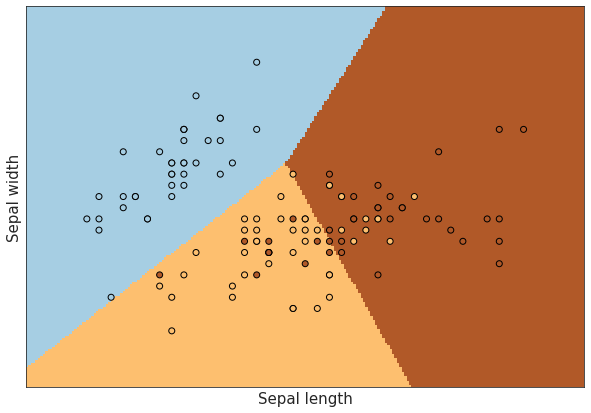

In [36]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 7))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length', fontsize=15)
plt.ylabel('Sepal width', fontsize=15)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [37]:
confusion_matrix(y_train, log_reg.predict(X_train))

array([[37,  0,  0],
       [ 0, 30, 12],
       [ 0, 13, 28]])

Confusion matrix, without normalization


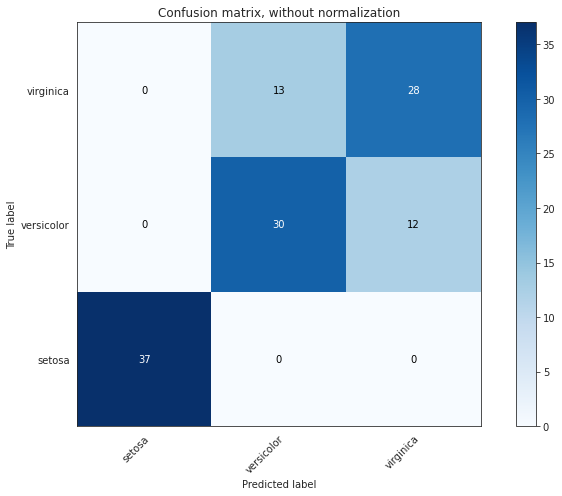

In [38]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(10,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.ylim([-0.5, 2.5])

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout();
    return ax

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_train, log_reg.predict(X_train), classes=iris.target_names,
                      title='Confusion matrix, without normalization')

## References:
* [Scikit Learn Library](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)
* [Logistic Regression for Machine Learning by Jason Brownlee PhD](https://machinelearningmastery.com/logistic-regression-for-machine-learning/)
* [Advertising - Logistic Regression](https://www.kaggle.com/arpitsomani/advertisement-logistic-regression#Predictions-and-Evaluations)